<a href="https://colab.research.google.com/github/PadamSharma/Stock_Price_Prediction/blob/main/Stock_price_model_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
!unzip /content/drive/MyDrive/StockPricePrediction/stock_dataset.zip

Archive:  /content/drive/MyDrive/StockPricePrediction/stock_dataset.zip
replace GOOG.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GOOG.csv                
  inflating: AAPL.csv                
  inflating: AMZN.csv                
  inflating: TSLA.csv                
  inflating: MSFT.csv                


In [148]:
!pip install -q pmdarima

In [149]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [150]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [151]:
apple_df = pd.read_csv('/content/AAPL.csv',index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
amazon_df = pd.read_csv('/content/AMZN.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
google_df = pd.read_csv('/content/GOOG.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
google_df = pd.read_csv('/content/GOOG.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
microsoft_df = pd.read_csv('/content/MSFT.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
tesla_df = pd.read_csv('/content/TSLA.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [152]:
start_date = '2015-01-01'

apple_df = apple_df.loc[start_date:]
amazon_df = amazon_df.loc[start_date:]
google_df = google_df.loc[start_date:]
microsoft_df = microsoft_df.loc[start_date:]
tesla_df = tesla_df.loc[start_date:]

In [153]:
google_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582


In [154]:
apple_close = apple_df['Adj Close']
amazon_close = amazon_df['Adj Close']
google_close = google_df['Adj Close']
microsoft_close = microsoft_df['Adj Close']
tesla_close = tesla_df['Adj Close']

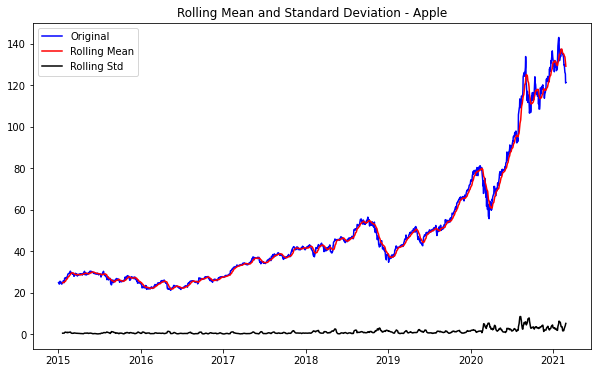

Results of dickey fuller test
Test Statistics                   1.120785
p-value                           0.995390
No. of lags used                 24.000000
Number of observations used    1524.000000
critical value (1%)              -3.434648
critical value (5%)              -2.863438
critical value (10%)             -2.567781
dtype: float64


In [155]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation - Apple')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(apple_close)

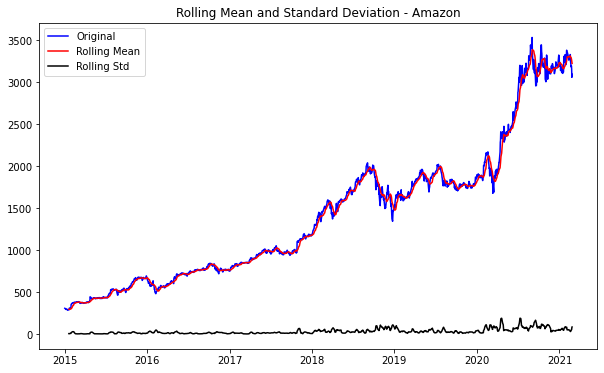

Results of dickey fuller test
Test Statistics                   0.270341
p-value                           0.975942
No. of lags used                 18.000000
Number of observations used    1530.000000
critical value (1%)              -3.434631
critical value (5%)              -2.863431
critical value (10%)             -2.567777
dtype: float64


In [156]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation - Amazon')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(amazon_close)

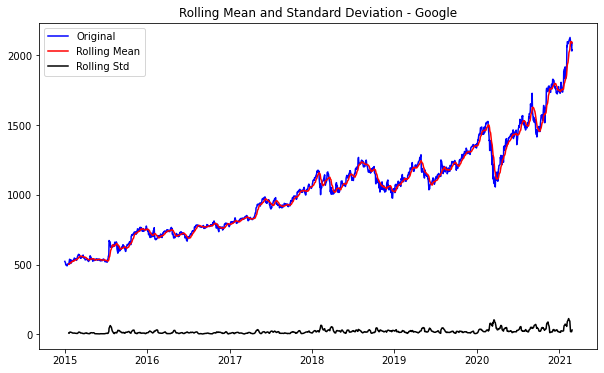

Results of dickey fuller test
Test Statistics                   0.672292
p-value                           0.989268
No. of lags used                 22.000000
Number of observations used    1526.000000
critical value (1%)              -3.434642
critical value (5%)              -2.863436
critical value (10%)             -2.567779
dtype: float64


In [157]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation - Google')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(google_close)

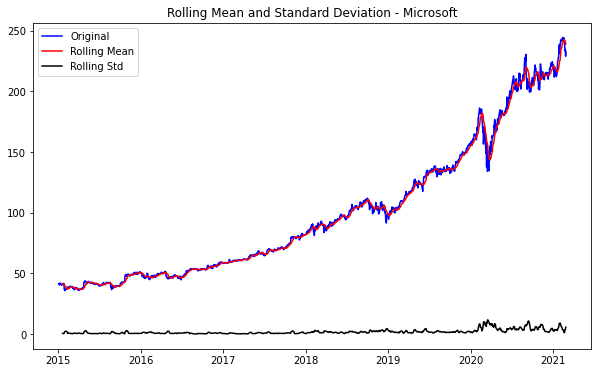

Results of dickey fuller test
Test Statistics                   2.126964
p-value                           0.998817
No. of lags used                 24.000000
Number of observations used    1524.000000
critical value (1%)              -3.434648
critical value (5%)              -2.863438
critical value (10%)             -2.567781
dtype: float64


In [158]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation - Microsoft')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(microsoft_close)

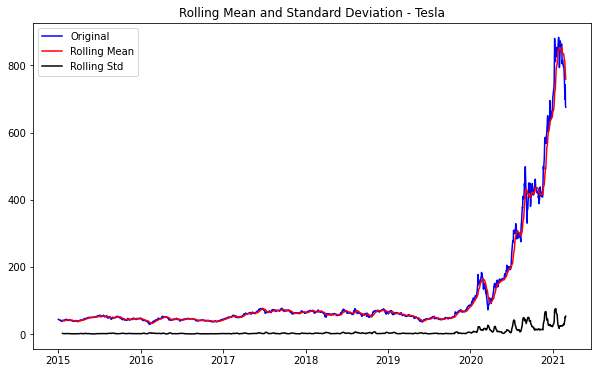

Results of dickey fuller test
Test Statistics                   0.399779
p-value                           0.981487
No. of lags used                 24.000000
Number of observations used    1524.000000
critical value (1%)              -3.434648
critical value (5%)              -2.863438
critical value (10%)             -2.567781
dtype: float64


In [159]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation - Tesla')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(tesla_close)

In [160]:
def split_data(df_log):
    #split data into train and training set
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    return train_data, test_data

In [161]:
def plot_diagnostics(model_autoARIMA):
    model_autoARIMA.plot_diagnostics(figsize=(15,8))
    plt.show()

In [162]:
def train_ARIMA(train_data):
    model = ARIMA(train_data, order=(3, 1, 2))  
    fitted_model = model.fit(disp=-1)  
    print(fitted_model.summary())
    return fitted_model

In [163]:
def forecast(fitted_model,company):
    # Forecast
    fc, se, conf = fitted_model.forecast(155, alpha=0.05)  # 95% confidence
    fc_series = pd.Series(fc, index=test_data.index)
    lower_series = pd.Series(conf[:, 0], index=test_data.index)
    upper_series = pd.Series(conf[:, 1], index=test_data.index)
    plt.figure(figsize=(10,5), dpi=100)
    #plt.plot(train_data, label='training')
    plt.plot(test_data, color = 'blue', label='Actual Stock Price')
    plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                    color='k', alpha=.10)
    plt.title(company+' Inc. Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Actual Stock Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc

================================================== APPLE ==================================================




                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1390
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3650.520
Method:                       css-mle   S.D. of innovations              0.018
Date:                Thu, 10 Jun 2021   AIC                          -7287.040
Time:                        13:09:03   BIC                          -7250.381
Sample:                             1   HQIC                         -7273.331
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0010      0.000      2.193      0.028       0.000       0.00

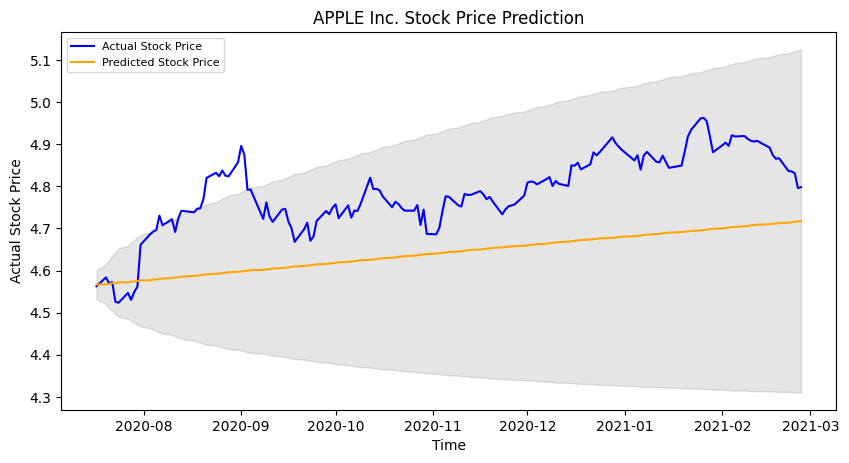





RMSE: 18.089865823071083







================================================== AMAZON ==================================================




                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1390
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3535.033
Method:                       css-mle   S.D. of innovations              0.019
Date:                Thu, 10 Jun 2021   AIC                          -7056.067
Time:                        13:09:06   BIC                          -7019.407
Sample:                             1   HQIC                         -7042.358
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0017      0.001      3.

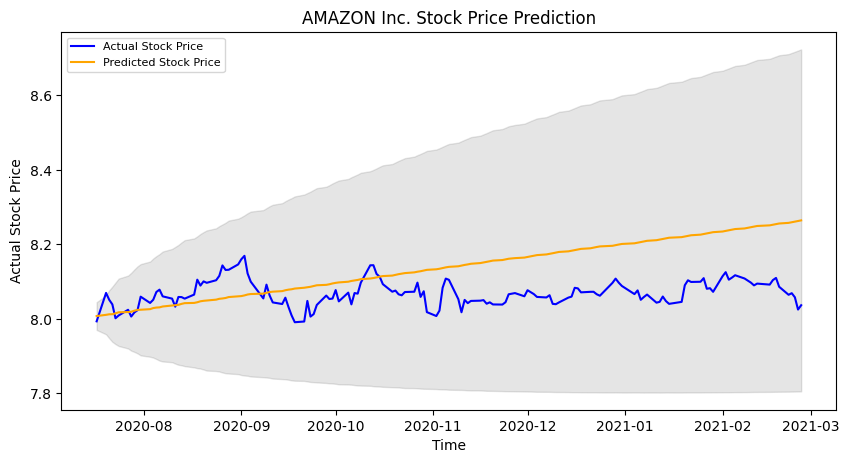





RMSE: 346.45063989660406







================================================== GOOGLE ==================================================




                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1390
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3736.775
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 10 Jun 2021   AIC                          -7459.550
Time:                        13:09:09   BIC                          -7422.891
Sample:                             1   HQIC                         -7445.841
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0008      0.000      1.

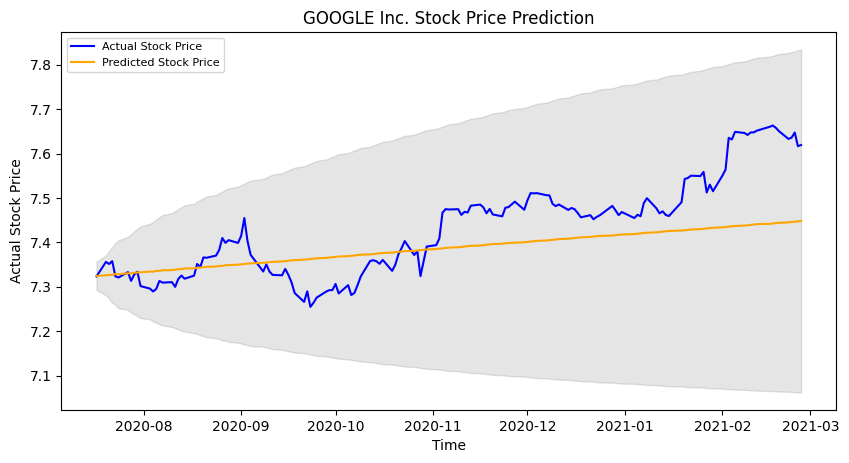





RMSE: 161.49364252058663







================================================== MICROSOFT ==================================================




                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1390
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3720.155
Method:                       css-mle   S.D. of innovations              0.017
Date:                Thu, 10 Jun 2021   AIC                          -7426.311
Time:                        13:09:11   BIC                          -7389.651
Sample:                             1   HQIC                         -7412.602
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0011      0.000     

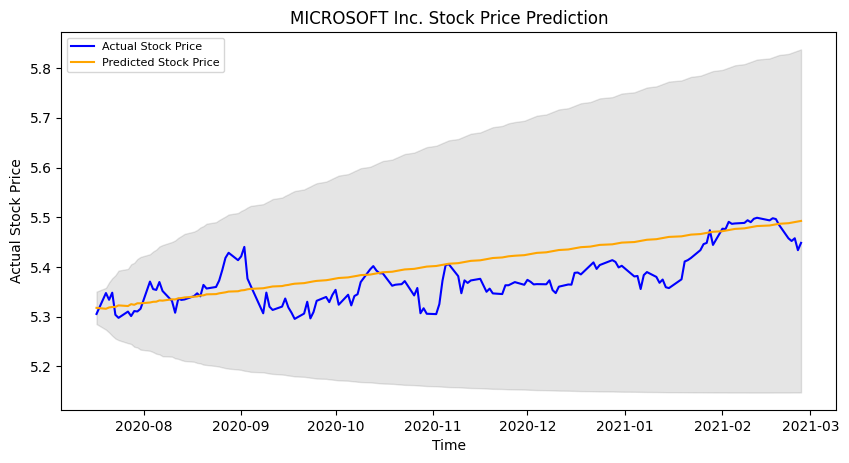





RMSE: 10.479780008205866







================================================== TESLA ==================================================




                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1390
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2773.474
Method:                       css-mle   S.D. of innovations              0.033
Date:                Thu, 10 Jun 2021   AIC                          -5532.949
Time:                        13:09:14   BIC                          -5496.289
Sample:                             1   HQIC                         -5519.240
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0014      0.001      1.5

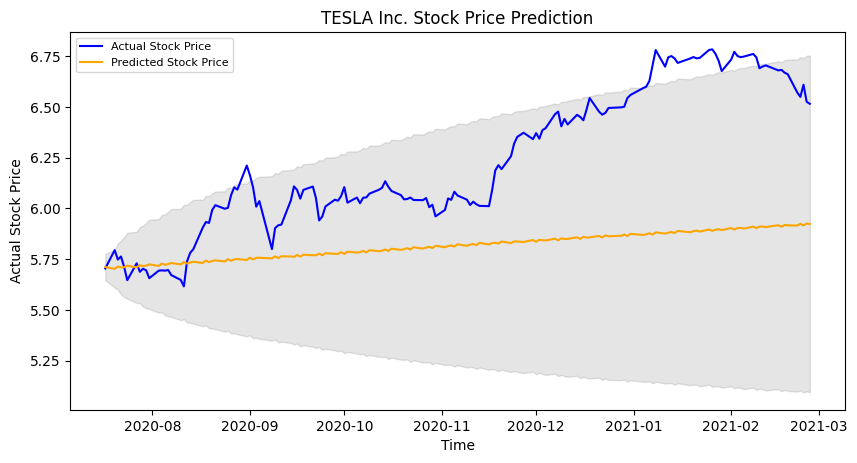





RMSE: 260.93005674905









In [164]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

for close, company in zip([apple_close, amazon_close, google_close, microsoft_close, tesla_close],['APPLE','AMAZON','GOOGLE','MICROSOFT','TESLA']):
    df_log = np.log(close)
    moving_avg = df_log.rolling(12).mean()
    std_dev = df_log.rolling(12).std()


    print('='*50,company,'='*50)
    print('\n'*3)

    train_data, test_data = split_data(df_log)

    fitted_model = train_ARIMA(train_data)

    fc = forecast(fitted_model,company)

    rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
    print('\n'*3)
    print('RMSE: '+str(rmse))
    print('\n'*6)